--- Initial Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            

/tmp/ipython-input-2073087863.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-2073087863.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


Boxplot for 'Fare' saved as 'fare_boxplot.png'

Original shape: (891, 13)
Shape after removing outliers in 'Fare': (775, 13)

Final cleaned dataset saved to 'titanic_cleaned_data.csv'


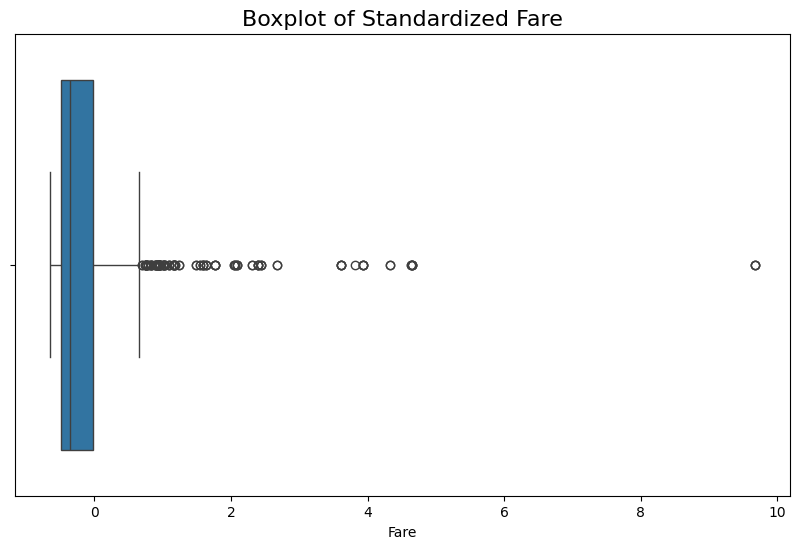

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# --- Step 1: Import and Explore Data ---
# Load the dataset
file_path = "Titanic-Dataset.csv"
df = pd.read_csv(file_path)

print("--- Initial Dataset Info ---")
df.info()

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Missing Values Count ---")
print(df.isnull().sum())

# --- Step 2: Handle Missing Values ---
# Impute missing 'Age' values with the median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print(f"\nFilled missing 'Age' values with the median ({median_age}).")

# Impute missing 'Embarked' values with the mode
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Filled missing 'Embarked' values with the mode ({mode_embarked}).")

# Drop the 'Cabin' column due to a large number of missing values
df.drop('Cabin', axis=1, inplace=True)
print("Dropped the 'Cabin' column due to high number of missing values.")

# Verify missing values again
print("\n--- Missing Values After Imputation/Drop ---")
print(df.isnull().sum())

# --- Step 3: Convert Categorical Features ---
# Convert 'Sex' into a numerical feature (0 for female, 1 for male)
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
print("\n'Sex' column converted to 'Sex_encoded' using Label Encoding.")

# One-Hot Encode the 'Embarked' column as it has more than two categories
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print("\n'Embarked' column converted to one-hot encoded columns.")

# --- Step 4: Normalize/Standardize Numerical Features ---
# Select numerical features for scaling
numerical_features = ['Age', 'Fare']
scaler = StandardScaler()

# Fit and transform the selected features
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("\n'Age' and 'Fare' columns have been standardized.")

# --- Step 5: Visualize Outliers and Remove ---
# Use the 'Fare' column for outlier visualization and removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Standardized Fare', fontsize=16)
plt.savefig('fare_boxplot.png')
print("\nBoxplot for 'Fare' saved as 'fare_boxplot.png'")

# Remove outliers using the IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
print(f"\nOriginal shape: {df.shape}")
print(f"Shape after removing outliers in 'Fare': {df_no_outliers.shape}")

# Save the final cleaned dataset to a new CSV file
df_no_outliers.to_csv('titanic_cleaned_data.csv', index=False)
print("\nFinal cleaned dataset saved to 'titanic_cleaned_data.csv'")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
